## WORKING WITH CSV AND JSON FILES
CSV (Comma Seperated Values) and JSON (JavaScript Object Notation) files are text files, they can be viewed using text editors. CSV files are simplied spreadsheets and JSON format is used in many web applications.

In [ ]:
import csv

## THE CSV MODULE
The CSV module is used for reading and writing CSV files. Each line in a CSV file represents a row in an excel spreadsheet and each cell value is seperated by a comma in a row.

## READING FROM CSV FILES
To read from a csv file, we use the reader() method, this method takes a file object as parameter. It also takes an optional parameter called delimeter. A delimiter is a character used to separate the values. By default, the delimiter is a comma. If the CSV file is seperated with a delimeter different from a comma, then you will have to pass the delimiter as an argument to the reader() method. 

In [ ]:
file_obj = open('100 Sales Records.csv', 'rt')
reader_obj = csv.reader(file_obj)
print(reader_obj)

You can iterate through the reader object to access contents of the csv file

In [ ]:
for line in reader_obj:
    print(line)
file_obj.close()

From the above code, you can see that the header was also printed out. If you do not want it printed out, you can skip it by using the next() iterator function. You can also choose which of the values you want to print.

In [ ]:
with open ('100 Sales Records.csv', 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    #next(csv_reader) #skipping the header rows
    for line in csv_reader:
        if(csv_reader.line_num == 1):
            continue
        print(f'Item:{line[2]} Units sold:{line[9]} Unit Price:{line[10]}')

## THE DICTREADER() METHOD
The CSV module has a DictReader() method which reads a csv file and returns an OrderedDict of values. An OrderedDict is a sub class of a dictionary that preserves the order in which the keys were inserted.
The DictReader() method is useful for csv files that have header rows. Unlike the reader() method which returns the header rows of a csv file as part of the contents of the file, the DictReader() uses the header rows as keys for each dictionary object.

In [ ]:
#f = open('100 Sales Records.csv', 'r')

with open('100 Sales Records.csv', 'r') as f:
    csv_reader = csv.DictReader(f)
    for line in csv_reader:
        print(line)

If there is no header rows in the csv file, the DictReader() would use the first row as dictionary keys. To avoid this, we can pass a list of headers to the DictReader() method.

## WRITING TO CSV FILES
To write data to a csv file, we use the writer() method of the csv module. This method also takes a file object as a parameter. The delimiter parameter is optional.


In [ ]:
f = open('100SalesRecords_copy.csv', 'w')
writer_obj = csv.writer(f)

The writer() method returns a writer object. This object has a writerow() method that takes a list of values as parameter. In the code below, we try to write some values in an existing csv file to a new csv file. 

In [ ]:
with open('100 Sales Records.csv', 'r') as file_reader:
    csv_reader = csv.DictReader(file_reader)
    with open('new_sales_records.csv', 'w') as file_writer:
        csv_writer = csv.writer(file_writer, delimiter = ',')
        csv_writer.writerow(['Item Type', 'Units Sold', 'Unit Price'])
        for line in csv_reader:
            item_type = line['Item Type']
            units_sold = line['Units Sold']
            units_price = line['Unit Price']
            csv_writer.writerow([item_type, units_sold, units_price])
            

## THE DICTWRITER() METHOD
The DictWriter() method is used to write dictionary objects to a csv file. Asides taking a file object as argument, this method also takes a delimiter and a list of headers (fieldnames) as parameters.

To write the headers to the csv file, we use the writeheader() method of the writer object.  The writerow() method of the dict writer object takes a dictionary object as parameter. The keys of the dictionary are headers of the csv.

In [ ]:
fields = ['Name', 'Gender', 'Age']
dict_list = [{'Name':'Angela', 'Gender':'Female', 'Age':20}, 
             {'Name':'Betty', 'Gender':'Female', 'Age':18},
            {'Name':'Charles', 'Gender':'Male', 'Age':19},
            {'Name':'Desmond', 'Gender':'Male', 'Age':22},
            {'Name':'Esther', 'Gender':'Female', 'Age':20}]

In [ ]:
with open('Students_list.csv', 'w') as f:
    csv_writer = csv.DictWriter(f,fieldnames =fields, delimiter = '\t')
    csv_writer.writeheader()
    for dict_item in dict_list:
        csv_writer.writerow(dict_item)

## JSON AND API
JSON stands for JavaScript Object Notation. It is a popular way to format data as a single human readable string. Many websites provide their content as json data for programs to interact with. This is known as API (Application Programming Interface). Accessing an API is similar to accesing a web page via a URL. To make an API call, you need to check the API documentation to know the URLs your program needs to request in order to get the data you want, as well as the general format of the JSON data structures that are returned.
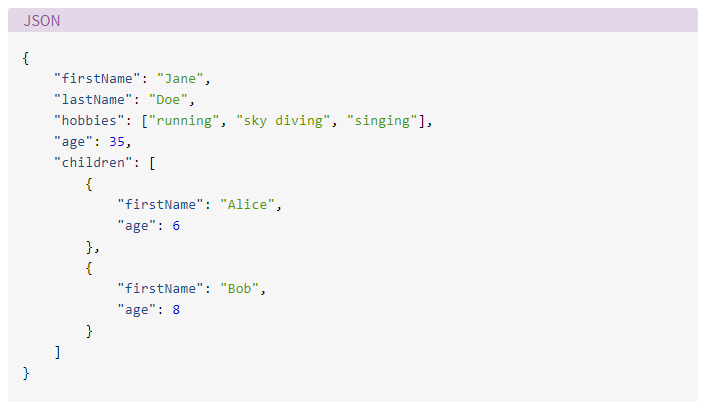

The above picture is an example of a json data. Json data supports primitive types; strings, numbers, nested data structures.

## THE JSON MODULE
The json module allows us to translate json data to python objects and vice versa. You can convert any python object to json. Below is the conversion chart for encoding/serialising python objects.

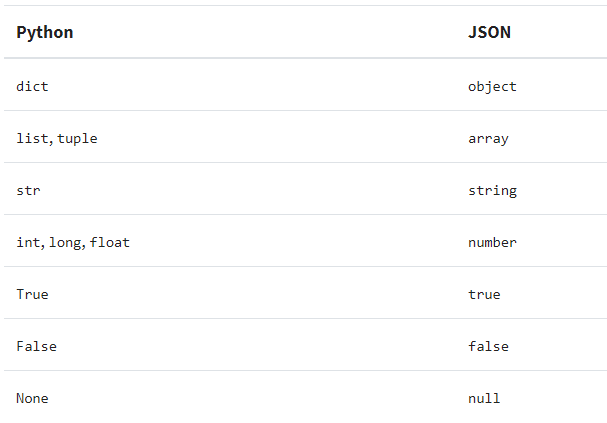

Below is the conversion chart for decoding/deserialising json data.

 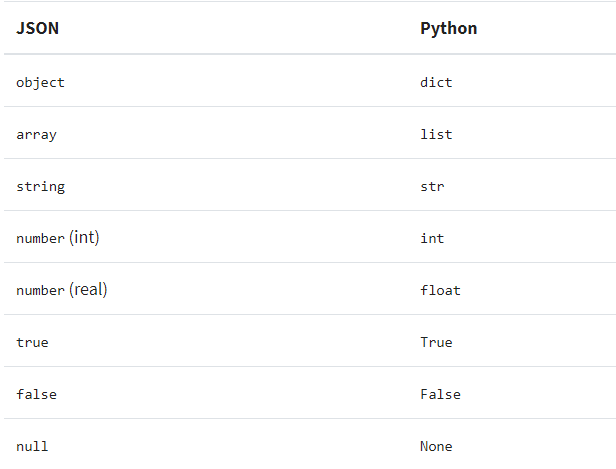

The json module has various methods to parse json data. The loads() and dumps() methods allow us to parse a string of json data. The loads() function which stands for `load string` allows us to translate/decode/deserialize a string of json data to a python object.

In [ ]:
import json
json_str = '{"name": "Amanda", "age": 20, "can_drive": true, "IQ": null}'
data = json.loads(json_str)
data
#type(json_str)

The dumps() function which stands for `dump string` is used to translate/encode/serialise python objects to a string of json data.

In [ ]:
data = {'name': 'Amanda', 'age': 20, 'can_drive': True, 'IQ': None}
json_str = json.dumps(data)
json_str

The load() and dump() methods allow us to parse a file containing json data. Below is an example of how we can use the load() method to deserialise a json data from a URL.

In [ ]:
with open('example_2.json', 'r') as f:
    data = json.load(f)

In [ ]:
print(data)

In [ ]:
data['quiz']['sport']['q1']['options']

Below is an example of how to serialise a python object to json using the dump method. The dump method takes two required parameters, the python object to be serialised and the file object to which the json data would be written.

In [ ]:
data = {
  "colors": [
    {
      "color": "black",
      "category": "hue",
      "type": "primary",
      "code": {
        "rgba": [255,255,255,1],
        "hex": "#000"
      }
    },
    {
      "color": "white",
      "category": "value",
      "code": {
        "rgba": [0,0,0,1],
        "hex": "#FFF"
      }
    },
    {
      "color": "red",
      "category": "hue",
      "type": "primary",
      "code": {
        "rgba": [255,0,0,1],
        "hex": "#FF0"
      }
    },
    {
      "color": "blue",
      "category": "hue",
      "type": "primary",
      "code": {
        "rgba": [0,0,255,1],
        "hex": "#00F"
      }
    }
  ]
}

In [ ]:
with open('colors.json', 'w') as f:
    json.dump(data, f, indent = 6)

## EXERCISE
Load the todo json data from the url https://jsonplaceholder.typicode.com/todos and write to a new csv file all todos that have been completed.

In [5]:
import requests
import csv

response = requests.get('https://jsonplaceholder.typicode.com/todos')

# Parse the JSON response
todos = response.json()

# Create a CSV writer
with open('completed_todos.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    writer.writerow(['userId', 'id', 'title', 'completed'])

    # Iterate over the todos and write the completed ones to the CSV file
    for todo in todos:
        if todo['completed']:
            writer.writerow([todo['userId'], todo['id'], todo['title'], todo['completed']])

In [9]:
import csv

with open('completed_todos.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        print(row)

['userId', 'id', 'title', 'completed']
['1', '4', 'et porro tempora', 'True']
['1', '8', 'quo adipisci enim quam ut ab', 'True']
['1', '10', 'illo est ratione doloremque quia maiores aut', 'True']
['1', '11', 'vero rerum temporibus dolor', 'True']
['1', '12', 'ipsa repellendus fugit nisi', 'True']
['1', '14', 'repellendus sunt dolores architecto voluptatum', 'True']
['1', '15', 'ab voluptatum amet voluptas', 'True']
['1', '16', 'accusamus eos facilis sint et aut voluptatem', 'True']
['1', '17', 'quo laboriosam deleniti aut qui', 'True']
['1', '19', 'molestiae ipsa aut voluptatibus pariatur dolor nihil', 'True']
['1', '20', 'ullam nobis libero sapiente ad optio sint', 'True']
['2', '22', 'distinctio vitae autem nihil ut molestias quo', 'True']
['2', '25', 'voluptas quo tenetur perspiciatis explicabo natus', 'True']
['2', '26', 'aliquam aut quasi', 'True']
['2', '27', 'veritatis pariatur delectus', 'True']
['2', '30', 'nemo perspiciatis repellat ut dolor libero commodi blanditiis omnis',